In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [17]:
df = pd.read_csv("manhattan_rents.csv")
print(df.iloc[20])

rental_id           2172.0
rent                3000.0
bedrooms               0.5
bathrooms              1.0
size_sqft            573.0
min_to_subway         11.0
floor                  8.0
building_age_yrs      31.0
Name: 20, dtype: float64


In [18]:
#Why did we adjust rents
#random()-0.5??

df.dropna(axis=0, inplace=True)
df['bedrooms']=df['bedrooms'].astype(int)
df.drop(['rental_id'], axis=1, inplace=True)
df = df[(df['size_sqft'] > 100)]

In [19]:
df.describe()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs
count,3536.000000,3536.000000,3536.000000,3536.000000,3536.000000,3536.000000,3536.000000
mean,5139.029977,1.345871,1.366799,939.841346,4.972002,11.909078,52.011312
std,3164.100385,0.969988,0.599685,478.102754,5.515729,10.965099,39.390748
min,1300.000000,0.000000,0.000000,250.000000,0.000000,0.000000,0.000000
25%,3150.000000,1.000000,1.000000,612.750000,2.000000,4.000000,15.000000
50%,4000.000000,1.000000,1.000000,800.000000,4.000000,8.000000,39.000000
75%,6000.000000,2.000000,2.000000,1141.500000,6.000000,17.000000,90.000000
max,20000.000000,5.000000,5.000000,4800.000000,43.000000,83.000000,180.000000


In [20]:
# create a MinMaxScaler object and apply it to the DataFrame

scaler = MinMaxScaler()
dfmms = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
print(dfmms)

          rent  bedrooms  bathrooms  size_sqft  min_to_subway     floor  \
0     0.066845       0.0        0.2   0.050549       0.209302  0.024096   
1     0.545455       0.4        0.4   0.384615       0.093023  0.012048   
2     0.171123       0.2        0.2   0.146374       0.046512  0.614458   
3     0.186898       0.2        0.2   0.159341       0.069767  0.096386   
4     0.866310       0.4        0.4   1.000000       0.069767  0.048193   
...        ...       ...        ...        ...            ...       ...   
3531  0.155615       0.2        0.2   0.061978       0.069767  0.096386   
3532  0.287433       0.4        0.4   0.162198       0.116279  0.120482   
3533  0.021337       0.0        0.2   0.000000       0.046512  0.060241   
3534  0.116310       0.2        0.2   0.088132       0.139535  0.060241   
3535  0.171123       0.2        0.2   0.124396       0.093023  0.132530   

      building_age_yrs  
0             0.094444  
1             0.533333  
2             0.161111  

In [21]:
# reverse the scaling process to get the original DataFrame
ogdf = pd.DataFrame(scaler.inverse_transform(dfmms), columns=dfmms.columns)
ogdf

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs
0,2550.0,0.0,1.0,480.0,9.0,2.0,17.0
1,11500.0,2.0,2.0,2000.0,4.0,1.0,96.0
2,4500.0,1.0,1.0,916.0,2.0,51.0,29.0
3,4795.0,1.0,1.0,975.0,3.0,8.0,31.0
4,17500.0,2.0,2.0,4800.0,3.0,4.0,136.0
...,...,...,...,...,...,...,...
3531,4210.0,1.0,1.0,532.0,3.0,8.0,16.0
3532,6675.0,2.0,2.0,988.0,5.0,10.0,9.0
3533,1699.0,0.0,1.0,250.0,2.0,5.0,96.0
3534,3475.0,1.0,1.0,651.0,6.0,5.0,14.0


In [22]:
#selecting only the features we need and making a new data frame

newdf = pd.DataFrame().assign(size_sqft=ogdf['size_sqft'], bathrooms=ogdf['bathrooms'], bedrooms=ogdf['bedrooms'], rent=ogdf['rent'])
newdf.head()
newdf.describe()

,size_sqft,bathrooms,bedrooms,rent
count,3536.000000,3536.000000,3536.000000,3536.000000
mean,939.841346,1.366799,1.345871,5139.029977
std,478.102754,0.599685,0.969988,3164.100385
min,250.000000,0.000000,0.000000,1300.000000
25%,612.750000,1.000000,1.000000,3150.000000
50%,800.000000,1.000000,1.000000,4000.000000
75%,1141.500000,2.000000,2.000000,6000.000000
max,4800.000000,5.000000,5.000000,20000.000000


In [23]:
#Puting data into numpy arrays

#1-d array
y = newdf['rent'].values
#2-d array with weights
X = newdf[['size_sqft', 'bathrooms', 'bedrooms']].values




In [24]:
#Splitting 70% of data to train and 30% to test
#X-Train is 2-d array with all features:sqft, bathroom, bedroom
#y-train is 1-d array with target feature: rent

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(len(X_train))

2475


In [25]:
#Model uses X-train to fit the best values for y-train 

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
#model predicts the values in y_test from the X_test values
#model was derrived from X_train and y_train


y_pred = model.predict(X_test)
y_pred[1]

7104.923838871539

In [27]:
#Actual dataset values = y_test
#Predicted model values = y_pred

for i in range(len(y_test)):
    print("Actual: " + str(y_test[i]))
    print("Predicted: "+ str(y_pred[i]))


Actual: 3200.0
Predicted: 3066.900955139121
Actual: 5300.0
Predicted: 7104.923838871539
Actual: 2100.0
Predicted: 2748.8540479034054
Actual: 3195.0
Predicted: 3678.8091222305575
Actual: 10500.000000000002
Predicted: 9118.545162805945
Actual: 10500.000000000002
Predicted: 7176.012513997035
Actual: 6850.0
Predicted: 7039.007692418574
Actual: 3300.0
Predicted: 3764.297386051874
Actual: 3550.0
Predicted: 3333.7108039481354
Actual: 11900.000000000002
Predicted: 12091.200237789584
Actual: 3294.9999999999995
Predicted: 3446.2504788161577
Actual: 2925.0
Predicted: 3384.9478623748364
Actual: 3500.0
Predicted: 3940.446442367039
Actual: 2100.0
Predicted: 2638.9006373716493
Actual: 4200.0
Predicted: 4840.763841311218
Actual: 6900.0
Predicted: 8287.00967398144
Actual: 5500.000000000001
Predicted: 5709.416299197048
Actual: 5855.000000000001
Predicted: 6897.109841498024
Actual: 4500.0
Predicted: 3752.204562361875
Actual: 13500.0
Predicted: 13550.596658241664
Actual: 3000.0
Predicted: 3372.85503868483

In [28]:
ytest_list = y_test.tolist()
ypred_list = y_pred.tolist()


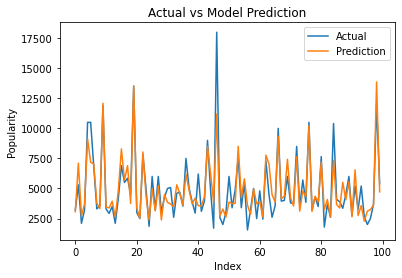

In [32]:
plt.plot([x for x in range(100)], ytest_list[:100], label='Actual')
plt.plot([x for x in range(100)], ypred_list[:100], label='Prediction')
plt.xlabel('Index')
plt.ylabel('Popularity')
plt.title('Actual vs Model Prediction')

plt.legend()
plt.show()

In [30]:
#Accuracy of model using mean squared error

mse = mean_squared_error(y_test, y_pred)
print('Mean squared error: ', mse)

Mean squared error:  2380651.55766173
